In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import gensim
import sklearn
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [87]:
df_cf_agg = pd.read_csv('../../data/crowdflower/cf_report_1008335_aggregated_agg_0_30k_1.csv')

In [88]:
len(df_cf_agg)

3696

In [89]:
df_cf_agg.head(3)

,id,category,is_displacement,number,paragraph,title,url
0,1213938960,disaster,no,636.0,JMA had already issued its highest level of fl...,"Japan Floods, Landslides: 8 Dead, 46 Injured; ...",https://weather.com/storms/typhoon/news/tropic...
1,1213938961,disaster,no,1074.0,A section of US Highway 30 was closed in the a...,Ten Oregon wildfires force hundreds to flee as...,http://www.theguardian.com/world/2014/aug/07/o...
2,1213938962,disaster,no,99.0,22- Number of confirmed local states of emerge...,By the numbers: 2013 Alberta floods,http://globalnews.ca/news/673236/by-the-number...


In [90]:
len(df_cf_agg['paragraph'].unique())

3331

In [91]:
df_cf_agg.drop_duplicates(subset=['paragraph'], inplace=True)

We have 45% disaster, 25% conflict, and 28% other.

In [92]:
df_cf_agg['category'].value_counts()

disaster                1530
other                    939
conflict_or_violence     862
Name: category, dtype: int64

I also want to get rid of columns that aren't going to help us classify the text.

In [93]:
df_cf_agg.drop(['id', 'is_displacement', 'number'], axis=1, inplace=True)

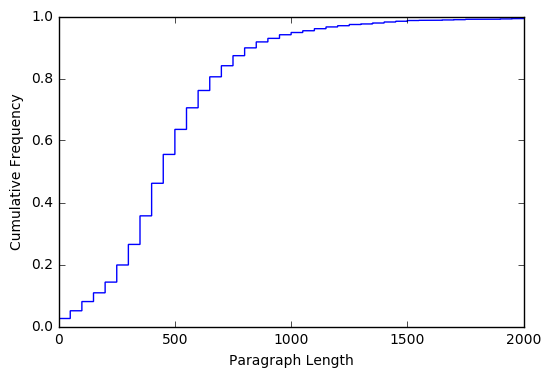

In [94]:
para_lengths = df_cf_agg['paragraph'].str.len()

bins = np.arange(0, 10000, 50)
ax = plt.figure()
ax = plt.hist(para_lengths, bins=bins, cumulative=True, normed=True, histtype='step')
plt.axis([0, 2000, 0, 1])
plt.xlabel('Paragraph Length')
plt.ylabel('Cumulative Frequency')

~10% of the paragraphs are under 200 characters. Let's remove them.

In [95]:
mask = (df_cf_agg['paragraph'].str.len() > 200)
df_cf_agg = df_cf_agg[mask]

This has mostly removed rows in the "other" category.

In [96]:
df_cf_agg['category'].value_counts()

disaster                1453
conflict_or_violence     831
other                    683
Name: category, dtype: int64

In [118]:
df_cf_agg.to_csv('../../data/crowdflower/cf_1_category_training.csv')

## Relevance

In [2]:
df_cf_agg = pd.read_csv('../../data/crowdflower/cf_report_1008335_aggregated_agg_0_30k_1.csv')

In [3]:
df_cf_agg['is_displacement'].value_counts()

no     2565
yes    1131
Name: is_displacement, dtype: int64

In [4]:
df_cf_agg.drop_duplicates(subset=['paragraph'], inplace=True)
df_cf_agg.drop(['id', 'category', 'number'], axis=1, inplace=True)
mask = (df_cf_agg['paragraph'].str.len() > 200)
df_cf_agg = df_cf_agg[mask]

In [5]:
df_cf_agg['is_displacement'].value_counts()

no     1895
yes    1072
Name: is_displacement, dtype: int64

In [6]:
df_cf_agg.head()

,is_displacement,paragraph,title,url
0,no,JMA had already issued its highest level of fl...,"Japan Floods, Landslides: 8 Dead, 46 Injured; ...",https://weather.com/storms/typhoon/news/tropic...
1,no,A section of US Highway 30 was closed in the a...,Ten Oregon wildfires force hundreds to flee as...,http://www.theguardian.com/world/2014/aug/07/o...
2,no,22- Number of confirmed local states of emerge...,By the numbers: 2013 Alberta floods,http://globalnews.ca/news/673236/by-the-number...
3,no,"As of late Wednesday evening, the top reported...","Japan Floods, Landslides: 8 Dead, 46 Injured; ...",https://weather.com/storms/typhoon/news/tropic...
4,no,What is DMIS ? The Disaster Management Informa...,Disaster Management Information System (DMIS),https://www-secure.ifrc.org/DMISII/pages/02_Di...


In [7]:
df_cf_agg.to_csv('../../data/crowdflower/cf_1_relevance_training.csv')

In [16]:
df_training = pd.read_csv('../../data/idmc_training_data_text_nopdf.csv')

In [17]:
df_training.drop_duplicates(subset=['URL'], inplace=True)
df_training.drop(['Country_or_region', 'Tag', 'URL', 'Unnamed: 0'], axis=1, inplace=True)
mask = (df_training['text'].str.len() > 300)
df_training = df_training[mask]

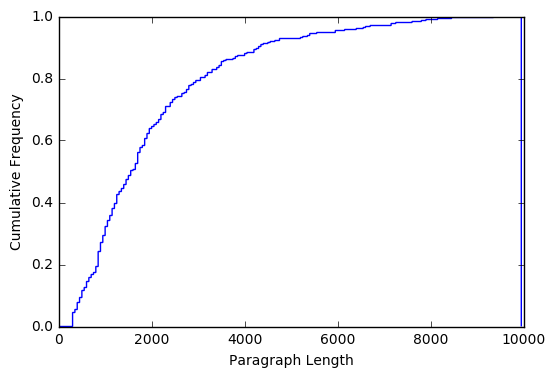

In [18]:
para_lengths = df_training['text'].str.len()

bins = np.arange(0, 10000, 50)
ax = plt.figure()
ax = plt.hist(para_lengths, bins=bins, cumulative=True, normed=True, histtype='step')
plt.axis([0, 10000, 0, 1])
plt.xlabel('Paragraph Length')
plt.ylabel('Cumulative Frequency')

In [26]:
df_training['is_displacement'] = label

In [28]:
df_training = df_training[df_training['is_displacement'] != 'x']

In [33]:
df_training.head(1)

,text,is_displacement
1,Flash flooding across Afghanistan and Pakistan...,yes


In [39]:
df_cf_agg.head(1)

,is_displacement,text
0,no,JMA had already issued its highest level of fl...


In [34]:
df_training['is_displacement'][df_training['is_displacement'] == 'n'] = 'no'

/Users/George/miniconda3/envs/nlp3/lib/python3.5/site-packages/pandas/core/generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/George/miniconda3/envs/nlp3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [37]:
df_cf_agg = df_cf_agg.rename(index=str, columns={"paragraph": "text"})

In [38]:
df_cf_agg.drop(['title', 'url'], axis=1, inplace=True)

In [40]:
df_relevance = pd.concat([df_training, df_cf_agg])

In [43]:
df_relevance.to_csv('../../data/relevance_training.csv')